In [16]:
from labdai.data_loaders import load_market_data
from labdai.utils import price_to_returns
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Consumer Staples = CSt

In [17]:
df_CSt = pd.read_csv('data/Consumer Staples-FSTA_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_CSt


,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.90,25.9000,25.3000,25.3350,23747
2013-10-25,25.33,25.3550,25.2650,25.3550,10411
2013-10-28,25.43,25.7699,25.4100,25.6900,56652
2013-10-29,25.82,25.9300,25.7010,25.9300,34965
2013-10-30,26.05,26.0500,25.7000,25.7100,189075
...,...,...,...,...,...
2021-11-29,43.91,44.0700,43.6938,43.9000,92367
2021-11-30,43.66,43.6600,42.7000,42.7500,102834
2021-12-01,43.02,43.3800,42.4301,42.4700,76502


In [18]:
df_CSt["Close"].std()

4.647083331728466

In [19]:
prices_df = df_CSt['Close']


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.

In [20]:
df_CSt_returns = price_to_returns(df_CSt, 1)
df_CSt_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.022008,-0.021042,-0.001383,0.000789,-0.561587
2013-10-28,0.003948,0.016364,0.005739,0.013212,4.441552
2013-10-29,0.015336,0.006213,0.011452,0.009342,-0.382811
2013-10-30,0.008908,0.004628,-0.000039,-0.008484,4.407550
2013-10-31,0.028407,0.117083,-0.005837,-0.004671,-0.921745


In [21]:
ret_CSt = df_CSt_returns['Close'].mean() * 252
ret_CSt

0.07683681809106013

In [22]:
std_CSt = df_CSt_returns['Close'].std()*(252. ** 0.5)
std_CSt

0.14433401081116615

# Financials

In [23]:
df_FI = pd.read_csv('data/Financials_FNCL_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_FI

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.41,25.4100,24.8600,24.941,18883
2013-10-25,24.95,25.0250,24.9500,25.001,15350
2013-10-28,25.06,25.1100,24.9600,25.010,33984
2013-10-29,25.22,25.2200,24.9750,25.059,16871
2013-10-30,25.22,25.2200,24.9000,24.940,26813
...,...,...,...,...,...
2021-11-29,56.61,56.6921,55.6300,56.070,160666
2021-11-30,55.36,55.5720,54.6259,54.690,313672
2021-12-01,55.57,56.0144,54.0400,54.050,722920


In [24]:
df_FI['Close'].std()

8.142995100712293

In [25]:
prices_df = df_FI['Close']


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.

In [26]:
df_FI_returns = price_to_returns(df_FI, 1)
df_FI_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.018103,-0.015152,0.003620,0.002406,-0.187100
2013-10-28,0.004409,0.003397,0.000401,0.000360,1.213941
2013-10-29,0.006385,0.004381,0.000601,0.001959,-0.503560
2013-10-30,0.000000,0.000000,-0.003003,-0.004749,0.589295
2013-10-31,-0.008723,-0.008723,-0.007992,-0.009222,3.147913


In [27]:
ret_FI = df_FI_returns['Close'].mean() * 252
ret_FI

0.1211962158770316

In [28]:
std_FI = df_FI_returns['Close'].std()*(252. ** 0.5)
std_FI


0.21981313046219988

# Real Estate = RE

In [29]:
df_RE = pd.read_csv('data/Real Estate_FREL_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_RE

,Open,High,Low,Close,Volume
Date,,,,,
2015-02-05,24.47,24.68,24.470,24.67,23330
2015-02-06,24.69,24.69,24.000,24.05,31750
2015-02-09,24.35,24.35,23.950,23.95,26805
2015-02-10,24.30,24.30,23.790,24.02,31474
2015-02-11,24.34,24.34,23.896,23.98,31893
...,...,...,...,...,...
2021-11-29,32.46,32.73,32.210,32.50,503865
2021-11-30,32.27,32.34,31.825,31.85,650348
2021-12-01,32.22,32.53,31.310,31.31,856977


In [30]:
df_RE["Close"].std()

2.7061197693017554

In [31]:
prices_df = df_RE['Close']


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_RE_returns = price_to_returns(df_RE, 1)
df_RE_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-02-06,0.008991,0.000405,-0.019207,-0.025132,0.360909
2015-02-09,-0.013771,-0.013771,-0.002083,-0.004158,-0.155748
2015-02-10,-0.002053,-0.002053,-0.006681,0.002923,0.174184
2015-02-11,0.001646,0.001646,0.004456,-0.001665,0.013313
2015-02-12,-0.000411,-0.000411,0.004352,0.011259,-0.367886


In [32]:
ret_RE = df_RE_returns['Close'].mean() * 252
ret_RE

0.06103458500356513

In [33]:
std_RE = df_RE_returns['Close'].std()*(252. ** 0.5)
std_RE

0.20984000419809737

# Information Technology = IT

In [34]:
df_IT = pd.read_csv('data/Information Technology_FTEC_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_IT

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.49,25.4900,24.9800,25.061,17687
2013-10-25,25.28,25.2899,25.0600,25.130,41667
2013-10-28,25.16,25.1850,25.0510,25.150,50547
2013-10-29,25.43,25.4300,25.1500,25.270,44745
2013-10-30,25.42,25.4200,25.1000,25.151,186437
...,...,...,...,...,...
2021-11-29,132.40,134.0000,131.9150,133.670,293881
2021-11-30,133.18,134.2900,131.1700,132.300,393956
2021-12-01,133.93,134.4300,129.8400,129.940,397070


In [35]:
df_IT["Close"].std()

28.3256390584843

In [36]:
df_IT["Close"].mean()

55.70097968673519

In [37]:
prices_df = df_IT


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_IT_returns = price_to_returns(df_IT, 1)
df_IT_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.008239,-0.007850,0.003203,0.002753,1.355798
2013-10-28,-0.004747,-0.004148,-0.000359,0.000796,0.213118
2013-10-29,0.010731,0.009728,0.003952,0.004771,-0.114784
2013-10-30,-0.000393,-0.000393,-0.001988,-0.004709,3.166655
2013-10-31,-0.012589,0.006688,-0.001793,0.001948,-0.922944


In [38]:
ret_IT = df_IT_returns['Close'].mean() * 252
ret_IT

0.22519295400713799

In [39]:
std_IT = df_IT_returns['Close'].std()*(252. ** 0.5)
std_IT

0.2145273848820359

# Consumer Discretionary = CD

In [40]:
df_CD = pd.read_csv('data/Consumer Discretionary-FDIS_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_CD

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.75,25.7500,25.2600,25.431,20677
2013-10-25,25.58,25.5999,25.4510,25.570,22294
2013-10-28,25.56,25.6850,25.4600,25.500,37272
2013-10-29,25.76,25.7600,25.4799,25.650,29436
2013-10-30,25.85,25.8500,25.4000,25.511,25671
...,...,...,...,...,...
2021-11-29,89.91,90.5267,89.5500,89.800,96615
2021-11-30,89.36,89.8800,87.8251,88.420,108109
2021-12-01,89.49,90.3085,86.6500,86.700,295137


In [41]:
df_CD["Close"].mean()

42.51300234948605

In [42]:
df_CD["Close"].std()

16.581272153157187

In [43]:
prices_df = df_CD


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_CD_returns = price_to_returns(df_CD, 1)
df_CD_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.006602,-0.005829,0.007561,0.005466,0.078203
2013-10-28,-0.000782,0.003324,0.000354,-0.002738,0.671840
2013-10-29,0.007825,0.002920,0.000782,0.005882,-0.210238
2013-10-30,0.003494,0.003494,-0.003136,-0.005419,-0.127905
2013-10-31,0.024758,0.046035,0.001969,0.001921,-0.556581


In [44]:
ret_CD = df_CD_returns['Close'].mean() * 252
ret_CD

0.16843778345522206

In [45]:
std_CD = df_CD_returns['Close'].std()*(252. ** 0.5)
std_CD

0.1863983213570196

# Health Care = HC

In [46]:
df_HC = pd.read_csv('data/Health Care_FHLC_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_HC

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.74,25.7400,25.1800,25.195,28799
2013-10-25,25.16,25.2100,25.1200,25.210,36151
2013-10-28,25.22,25.3200,25.1800,25.280,87612
2013-10-29,25.46,25.4600,25.2810,25.430,59878
2013-10-30,25.63,25.6300,25.1910,25.250,253943
...,...,...,...,...,...
2021-11-29,65.64,65.6600,65.1300,65.140,132658
2021-11-30,64.92,65.1553,63.9000,64.020,231516
2021-12-01,64.38,65.0350,63.6300,63.630,122187


In [47]:
df_HC["Close"].mean()

41.44793020068527

In [48]:
df_HC["Close"].std()

10.442115021400125

In [49]:
prices_df = df_HC


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_HC_returns = price_to_returns(df_HC, 1)
df_HC_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.022533,-0.020591,-0.002383,0.000595,0.255287
2013-10-28,0.002385,0.004363,0.002389,0.002777,1.423501
2013-10-29,0.009516,0.005529,0.004011,0.005934,-0.316555
2013-10-30,0.006677,0.006677,-0.003560,-0.007078,3.241007
2013-10-31,-0.005853,-0.001171,-0.002822,-0.003960,-0.904557


In [50]:
ret_HC = df_HC_returns['Close'].mean() * 252
ret_HC

0.1300114351030404

In [51]:
std_HC = df_HC_returns['Close'].std()*(252. ** 0.5)
std_HC

0.1752457701008189

# Materials = MA

In [52]:
df_MA = pd.read_csv('data/Materials_FMAT_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_MA

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.61,25.6100,25.130,25.261,6900
2013-10-25,25.33,25.3300,25.101,25.251,6227
2013-10-28,25.34,25.3400,25.125,25.190,21857
2013-10-29,25.43,25.4300,25.080,25.230,14976
2013-10-30,25.46,25.4600,24.960,25.060,27059
...,...,...,...,...,...
2021-11-29,48.69,48.6900,48.050,48.380,63760
2021-11-30,48.13,48.1668,46.990,47.080,80864
2021-12-01,47.85,48.2050,46.530,46.530,60019


In [53]:
df_MA["Close"].mean()

31.66774610866373

In [54]:
df_MA["Close"].std()

6.201639804597882

In [55]:
df_MA["Close"].describe()

count    2043.000000
mean       31.667746
std         6.201640
min        20.810000
25%        27.300000
50%        30.630000
75%        33.980250
max        50.420000
Name: Close, dtype: float64

In [56]:
prices_df = df_MA


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_MA_returns = price_to_returns(df_MA, 1)
df_MA_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.010933,-0.010933,-0.001154,-0.000396,-0.097536
2013-10-28,0.000395,0.000395,0.000956,-0.002416,2.510037
2013-10-29,0.003552,0.003552,-0.001791,0.001588,-0.314819
2013-10-30,0.001180,0.001180,-0.004785,-0.006738,0.806824
2013-10-31,0.009427,0.147290,0.001643,0.000399,-0.121660


In [57]:
ret_MA = df_MA_returns['Close'].mean() * 252
ret_MA

0.0988733123720158

In [58]:
std_MA = df_MA_returns['Close'].std()*(252. ** 0.5)
std_MA

0.20655469323409345

# Utilities = UT

In [59]:
df_UT = pd.read_csv('data/Utilities_FUTY_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_UT

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.25,25.29,25.170,25.235,15427
2013-10-25,25.24,25.51,25.200,25.501,14869
2013-10-28,25.53,25.60,25.411,25.480,39471
2013-10-29,25.71,25.71,25.441,25.529,15550
2013-10-30,25.59,25.69,25.360,25.390,163459
...,...,...,...,...,...
2021-11-29,43.52,43.96,43.270,43.850,77592
2021-11-30,43.68,43.68,42.560,42.560,91521
2021-12-01,42.80,43.70,42.630,42.650,108888


In [60]:
df_UT["Close"].mean()

34.2854659813999

In [61]:
df_UT["Close"].std()

5.441853326393255

In [62]:
df_UT["Close"].describe()

count    2043.000000
mean       34.285466
std         5.441853
min        24.401000
25%        29.495000
50%        33.780000
75%        38.833150
max        46.210000
Name: Close, dtype: float64

In [63]:
prices_df = df_UT


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_UT_returns = price_to_returns(df_UT, 1)
df_UT_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.000396,0.008699,0.001192,0.010541,-0.036170
2013-10-28,0.011490,0.003528,0.008373,-0.000823,1.654583
2013-10-29,0.007051,0.004297,0.001181,0.001923,-0.606040
2013-10-30,-0.004667,-0.000778,-0.003184,-0.005445,9.511833
2013-10-31,-0.003908,-0.007785,-0.010252,-0.003899,-0.924587


In [64]:
ret_UT = df_UT_returns['Close'].mean() * 252
ret_UT

0.08516369093988435

In [65]:
std_UT = df_UT_returns['Close'].std()*(252. ** 0.5)
std_UT

0.1881965759105868

# Communication Services = CSe

In [66]:
df_CSe = pd.read_csv('data/Communication Services-FCOM_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_CSe

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.50,25.5000,25.1600,25.291,15148
2013-10-25,25.31,25.4099,25.2799,25.405,6259
2013-10-28,25.46,25.5200,25.3800,25.520,28142
2013-10-29,25.76,25.8100,25.5710,25.770,13368
2013-10-30,26.01,26.0100,25.5699,25.680,9994
...,...,...,...,...,...
2021-11-29,52.01,52.0300,51.4750,51.810,87475
2021-11-30,51.49,51.5000,50.2200,50.280,126584
2021-12-01,50.99,51.1244,48.9800,49.000,90402


In [67]:
df_CSe["Close"].mean()

33.00973162016642

In [68]:
df_CSe["Close"].std()

7.953842144591258

In [69]:
df_CSe["Close"].describe()

count    2043.000000
mean       33.009732
std         7.953842
min        24.210000
25%        27.459950
50%        30.830000
75%        33.935000
max        57.120000
Name: Close, dtype: float64

In [70]:
prices_df = df_CSe


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_CSe_returns = price_to_returns(df_CSe, 1)
df_CSe_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.007451,-0.003533,0.004766,0.004508,-0.586810
2013-10-28,0.005927,0.004333,0.003960,0.004527,3.496245
2013-10-29,0.011783,0.011364,0.007526,0.009796,-0.524980
2013-10-30,0.009705,0.007749,-0.000043,-0.003492,-0.252394
2013-10-31,0.026144,0.026144,-0.008604,-0.005062,9.738043


In [71]:
ret_CSe = df_CSe_returns['Close'].mean() * 252
ret_CSe

0.10077050945891733

In [72]:
std_CSe = df_CSe_returns['Close'].std()*(252. ** 0.5)
std_CSe

0.18565147268273613

# Energy = EN

In [73]:
df_EN = pd.read_csv('data/Energy_FENY_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_EN

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.25,25.2500,24.680,24.925,24339
2013-10-25,24.96,25.0699,24.861,24.995,21795
2013-10-28,25.02,25.0650,24.925,25.040,47473
2013-10-29,25.28,25.2800,25.090,25.220,36048
2013-10-30,25.25,25.3500,24.910,25.060,50198
...,...,...,...,...,...
2021-11-29,15.59,15.7190,15.260,15.320,765163
2021-11-30,14.99,15.2200,14.840,14.900,1119769
2021-12-01,15.29,15.3999,14.710,14.710,863222


In [74]:
df_EN["Close"].mean()

18.35546529613314

In [75]:
df_EN["Close"].std()

4.835324095436485

In [76]:
df_EN["Close"].describe()

count    2043.000000
mean       18.355465
std         4.835324
min         6.200000
25%        15.635000
50%        18.670000
75%        21.130000
max        29.420000
Name: Close, dtype: float64

In [77]:
prices_df = df_EN


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_EN_returns = price_to_returns(df_EN, 1)
df_EN_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,-0.011485,-0.007133,0.007334,0.002808,-0.104524
2013-10-28,0.002404,-0.000195,0.002574,0.001800,1.178160
2013-10-29,0.010392,0.008578,0.006620,0.007188,-0.240663
2013-10-30,-0.001187,0.002769,-0.007174,-0.006344,0.392532
2013-10-31,0.033267,0.029191,0.000843,-0.002394,-0.361628


In [78]:
ret_EN = df_EN_returns['Close'].mean() * 252
ret_EN

-0.0176585859863014

In [79]:
std_EN = df_EN_returns['Close'].std()*(252. ** 0.5)
std_EN

0.29828995411920245

In [80]:
Efficiency = ret_EN/std_EN
Efficiency

-0.0591993989152068

# Industrials = IN

In [81]:
df_IN = pd.read_csv('data/Industrials_FIDU_Price_History_20211203.csv',index_col='Date', parse_dates=True)
df_IN

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-24,25.43,25.5100,25.3900,25.4910,6672
2013-10-25,25.55,25.5650,25.4200,25.5650,20183
2013-10-28,25.57,25.6199,25.5200,25.5800,35032
2013-10-29,25.80,25.8000,25.5000,25.6199,32994
2013-10-30,25.86,25.8600,25.4410,25.5000,29325
...,...,...,...,...,...
2021-11-29,55.98,55.9800,55.0600,55.4200,52707
2021-11-30,54.95,55.0300,53.7700,53.7700,271321
2021-12-01,54.76,54.9287,53.0800,53.1000,65873


In [82]:
df_IN["Close"].mean()

35.74403558492413

In [83]:
df_IN["Close"].std()

8.158628122570672

In [84]:
df_IN["Close"].describe()

count    2043.000000
mean       35.744036
std         8.158628
min        24.410000
25%        28.585000
50%        34.850000
75%        39.675000
max        57.460000
Name: Close, dtype: float64

In [85]:
prices_df = df_IN


def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
    assert prices_df.index.is_monotonic_increasing
    prices_past = prices_df.iloc[:-lag, :]
    prices_future = prices_df.iloc[lag:,:]
    return (prices_future / prices_past.values) - 1.



df_IN_returns = price_to_returns(df_IN, 1)
df_IN_returns.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-10-25,0.004719,0.002156,0.001182,0.002903,2.025030
2013-10-28,0.000783,0.002147,0.003934,0.000587,0.735718
2013-10-29,0.008995,0.007030,-0.000784,0.001560,-0.058175
2013-10-30,0.002326,0.002326,-0.002314,-0.004680,-0.111202
2013-10-31,0.024362,0.024362,-0.001219,0.000000,-0.010537


In [86]:
ret_IN = df_IN_returns['Close'].mean() * 252
ret_IN

0.11314313460383138

In [87]:
std_IN = df_IN_returns['Close'].std()*(252. ** 0.5)
std_IN

0.19707208964438827

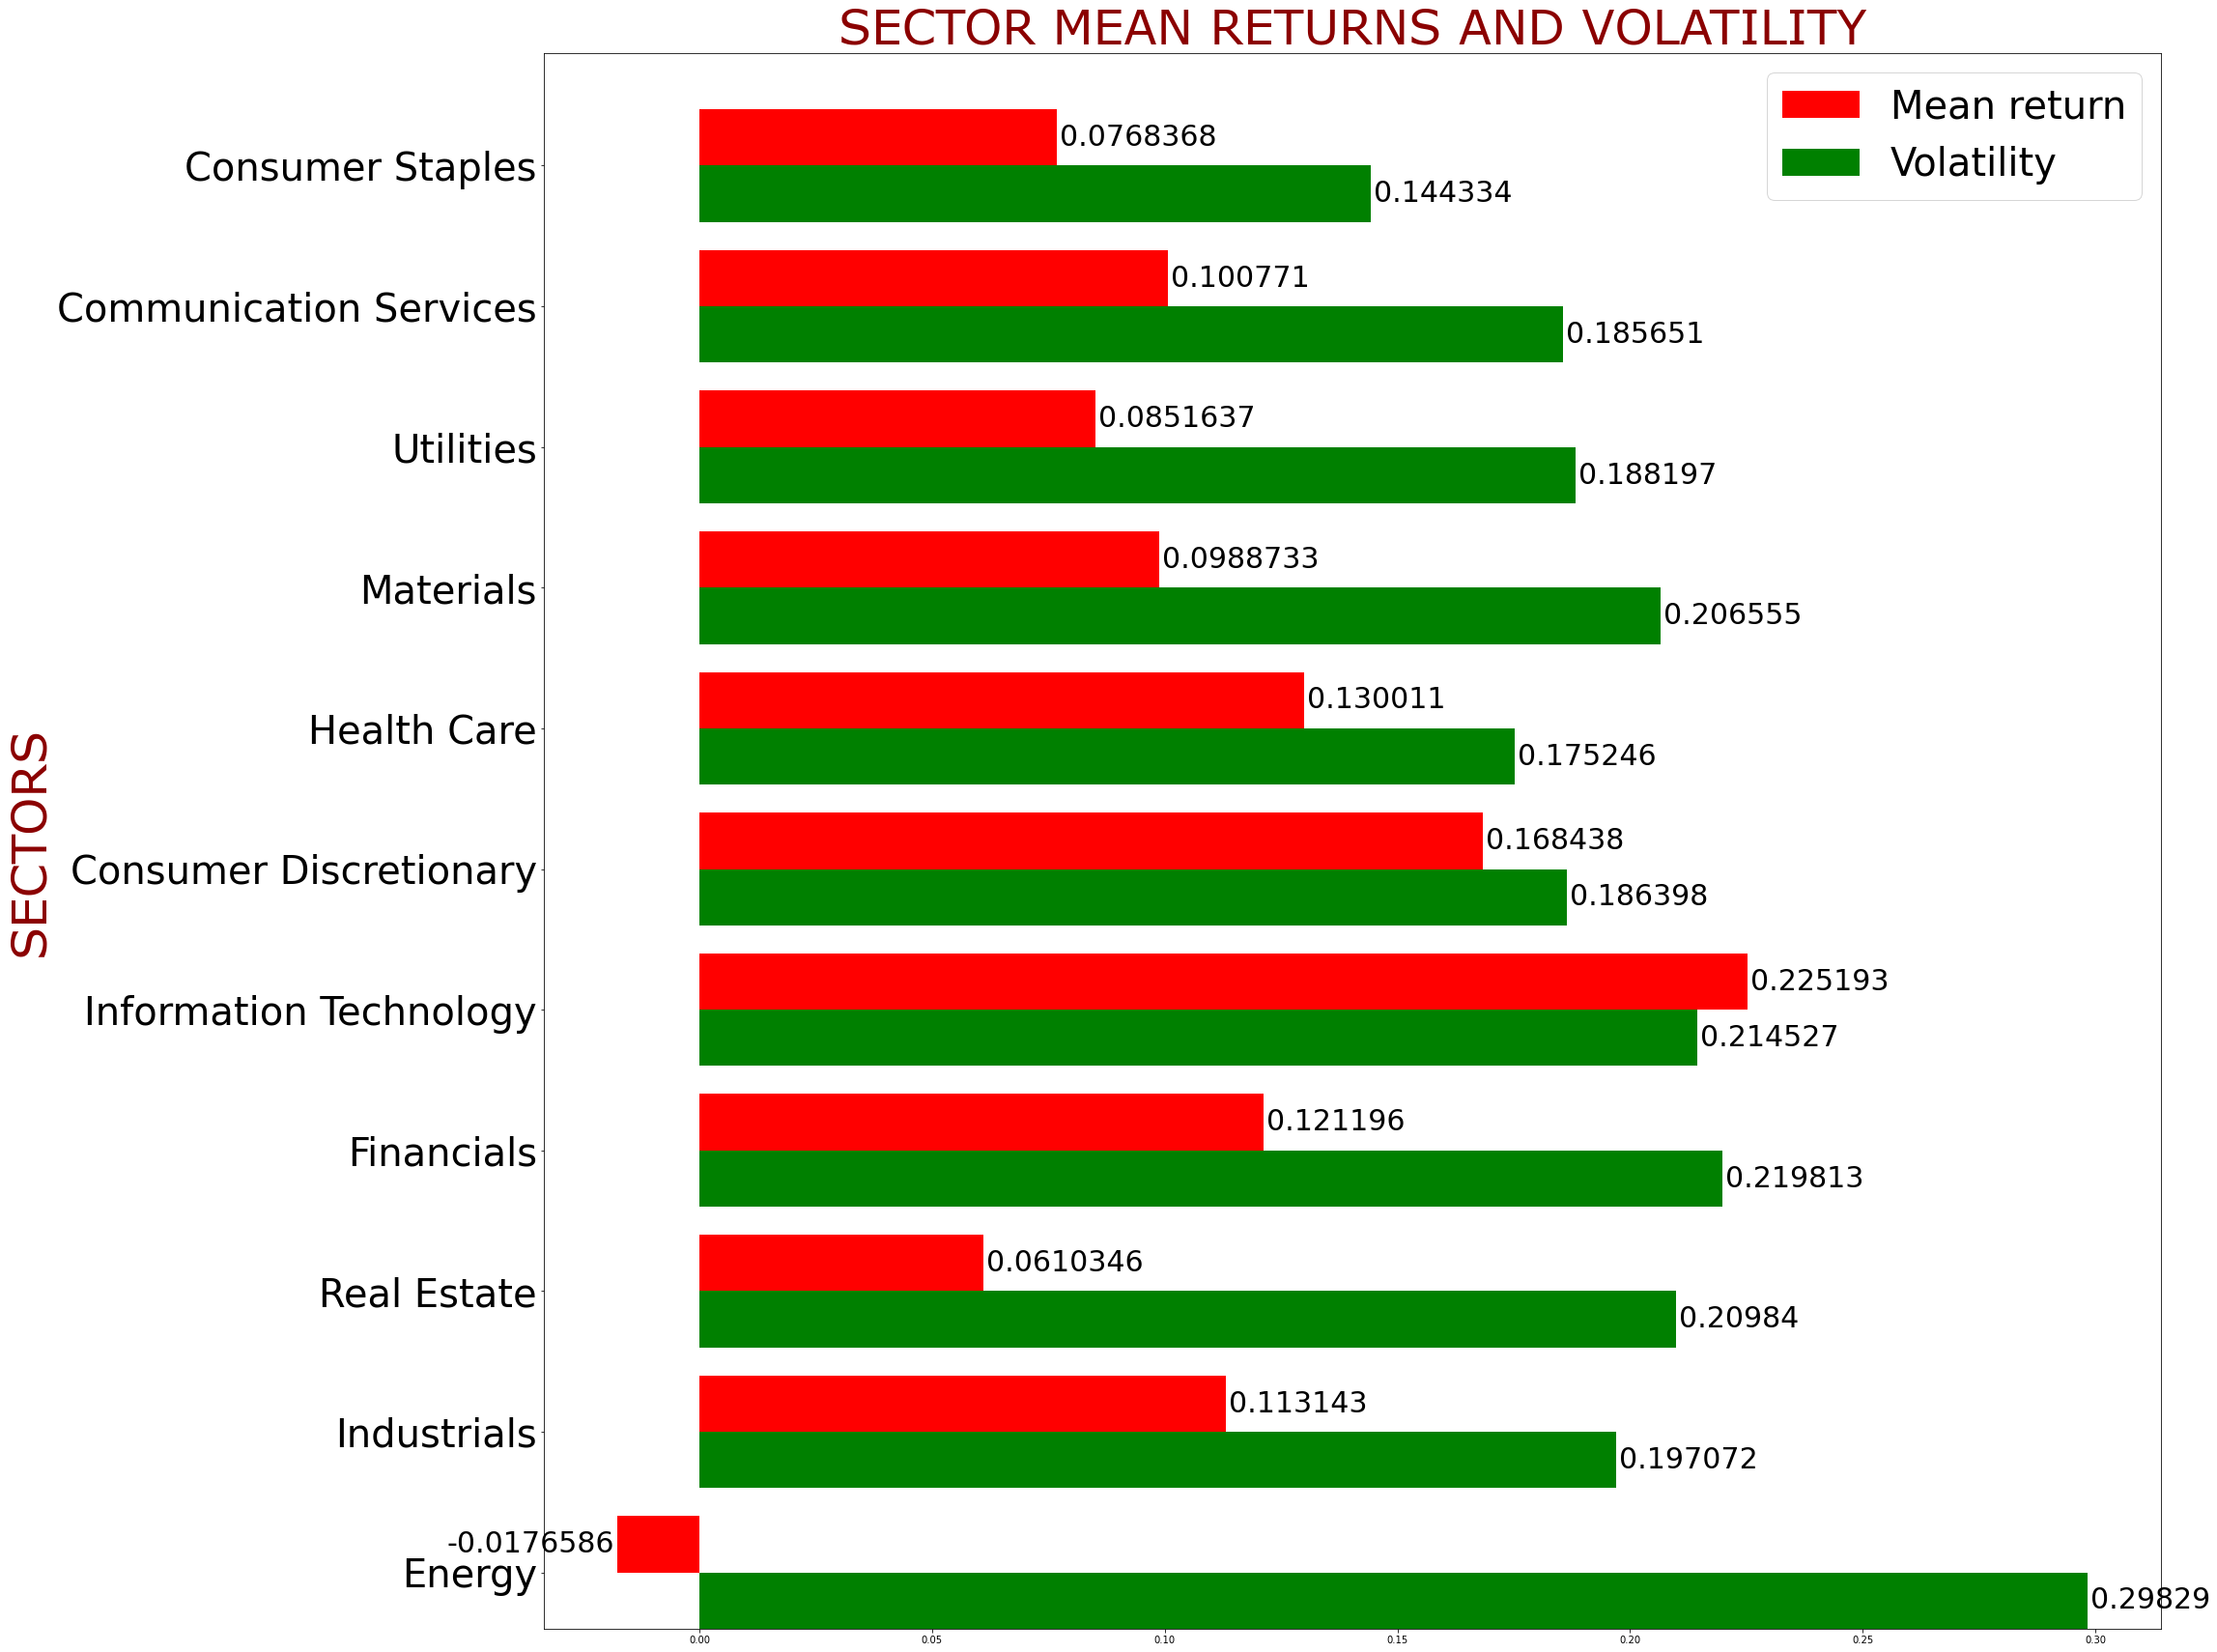

In [88]:
labels = ["Energy", "Industrials", "Real Estate", "Financials", "Information Technology", 
          "Consumer Discretionary", "Health Care", "Materials", "Utilities",
         "Communication Services", "Consumer Staples"]
Mean_Return = [ret_EN, ret_IN, ret_RE, ret_FI, ret_IT, ret_CD, ret_HC, ret_MA, ret_UT,
              ret_CSe, ret_CSt]
Volatility = [std_EN, std_IN, std_RE, std_FI, std_IT, std_CD, std_HC, std_MA, std_UT,
             std_CSe, std_CSt]

font = {'family': 'Verdana',
        'color':  'darkred',
        'weight': 'normal',
        'size': 50,
        }


ind = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(30, 30))

rects1 = ax.barh(ind + width, Mean_Return, width, color='red', label='Mean return')
rects2 = ax.barh(ind, Volatility, width, color='green', label='Volatility')


ax.set(yticks=ind + width/2, yticklabels=labels, ylim=[2*width - 1, len(labels)])
ax.legend(fontsize=40)
ax.set_yticklabels(labels, fontsize=40)


ax.bar_label(rects1, padding=3, size = 30)
ax.bar_label(rects2, padding=3, size = 30)


#plt.xlabel('PORTFOLIO RETURN', size = 20)
plt.ylabel ('SECTORS', size = 50, rotation = "vertical", fontdict=font)
plt.title("SECTOR MEAN RETURNS AND VOLATILITY", fontdict=font)
plt.show()

# Find correlation between sector returns

In [89]:
df_TOT=pd.concat([df_CSt_returns['Close'], df_FI_returns['Close'], 
                  df_RE_returns['Close'], df_IT_returns['Close'], 
                 df_CD_returns['Close'], df_HC_returns['Close'],
                  df_MA_returns['Close'], df_UT_returns['Close'],
                  df_CSe_returns['Close'], df_EN_returns['Close'],
                  df_IN_returns['Close']], axis=1)
df_TOT

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,
2013-10-25,0.000789,0.002406,NaN,0.002753,0.005466,0.000595,-0.000396,0.010541,0.004508,0.002808,0.002903
2013-10-28,0.013212,0.000360,NaN,0.000796,-0.002738,0.002777,-0.002416,-0.000823,0.004527,0.001800,0.000587
2013-10-29,0.009342,0.001959,NaN,0.004771,0.005882,0.005934,0.001588,0.001923,0.009796,0.007188,0.001560
2013-10-30,-0.008484,-0.004749,NaN,-0.004709,-0.005419,-0.007078,-0.006738,-0.005445,-0.003492,-0.006344,-0.004680
2013-10-31,-0.004671,-0.009222,NaN,0.001948,0.001921,-0.003960,0.000399,-0.003899,-0.005062,-0.002394,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,0.002741,0.002145,0.009317,0.023429,0.009897,0.001692,0.002071,0.013404,0.004654,0.006570,0.001989
2021-11-30,-0.026196,-0.024612,-0.020000,-0.010249,-0.015367,-0.017194,-0.026871,-0.029418,-0.029531,-0.027415,-0.029773
2021-12-01,-0.006550,-0.011702,-0.016954,-0.017838,-0.019453,-0.006092,-0.011682,0.002115,-0.025457,-0.012752,-0.012460


In [90]:
df_TOT.columns = ['Consumer Staples', 'Financials', 'Real Estate', 'Information Technology', 
                  'Consumer Discretionary', 'Health Care', 'Materials', 'Utilities', 
                  'Communication Services', 'Energy', 'Industrials']
df_TOT
#df_TOT.dropna() #start from 2015

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials
Date,,,,,,,,,,,
2013-10-25,0.000789,0.002406,NaN,0.002753,0.005466,0.000595,-0.000396,0.010541,0.004508,0.002808,0.002903
2013-10-28,0.013212,0.000360,NaN,0.000796,-0.002738,0.002777,-0.002416,-0.000823,0.004527,0.001800,0.000587
2013-10-29,0.009342,0.001959,NaN,0.004771,0.005882,0.005934,0.001588,0.001923,0.009796,0.007188,0.001560
2013-10-30,-0.008484,-0.004749,NaN,-0.004709,-0.005419,-0.007078,-0.006738,-0.005445,-0.003492,-0.006344,-0.004680
2013-10-31,-0.004671,-0.009222,NaN,0.001948,0.001921,-0.003960,0.000399,-0.003899,-0.005062,-0.002394,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,0.002741,0.002145,0.009317,0.023429,0.009897,0.001692,0.002071,0.013404,0.004654,0.006570,0.001989
2021-11-30,-0.026196,-0.024612,-0.020000,-0.010249,-0.015367,-0.017194,-0.026871,-0.029418,-0.029531,-0.027415,-0.029773
2021-12-01,-0.006550,-0.011702,-0.016954,-0.017838,-0.019453,-0.006092,-0.011682,0.002115,-0.025457,-0.012752,-0.012460


In [91]:
# 6/8-year correlation matrix among the sectors of the S&P 500 index
corr = df_TOT.corr()
corr

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials
Consumer Staples,1.000000,0.654542,0.733042,0.662942,0.670918,0.691798,0.664845,0.729063,0.662068,0.480270,0.702208
Financials,0.654542,1.000000,0.699532,0.698129,0.757799,0.695025,0.839804,0.518625,0.671384,0.737839,0.893177
Real Estate,0.733042,0.699532,1.000000,0.626015,0.680700,0.637576,0.682072,0.770463,0.643731,0.543609,0.726982
Information Technology,0.662942,0.698129,0.626015,1.000000,0.875332,0.784873,0.732440,0.473489,0.755298,0.538351,0.773057
Consumer Discretionary,0.670918,0.757799,0.680700,0.875332,1.000000,0.753518,0.780670,0.474307,0.777351,0.594479,0.822384
Health Care,0.691798,0.695025,0.637576,0.784873,0.753518,1.000000,0.707260,0.531998,0.665539,0.521689,0.743774
Materials,0.664845,0.839804,0.682072,0.732440,0.780670,0.707260,1.000000,0.527930,0.676864,0.751242,0.904431
Utilities,0.729063,0.518625,0.770463,0.473489,0.474307,0.531998,0.527930,1.000000,0.517119,0.387368,0.554111
Communication Services,0.662068,0.671384,0.643731,0.755298,0.777351,0.665539,0.676864,0.517119,1.000000,0.548391,0.710894
Energy,0.480270,0.737839,0.543609,0.538351,0.594479,0.521689,0.751242,0.387368,0.548391,1.000000,0.744137


<AxesSubplot:>

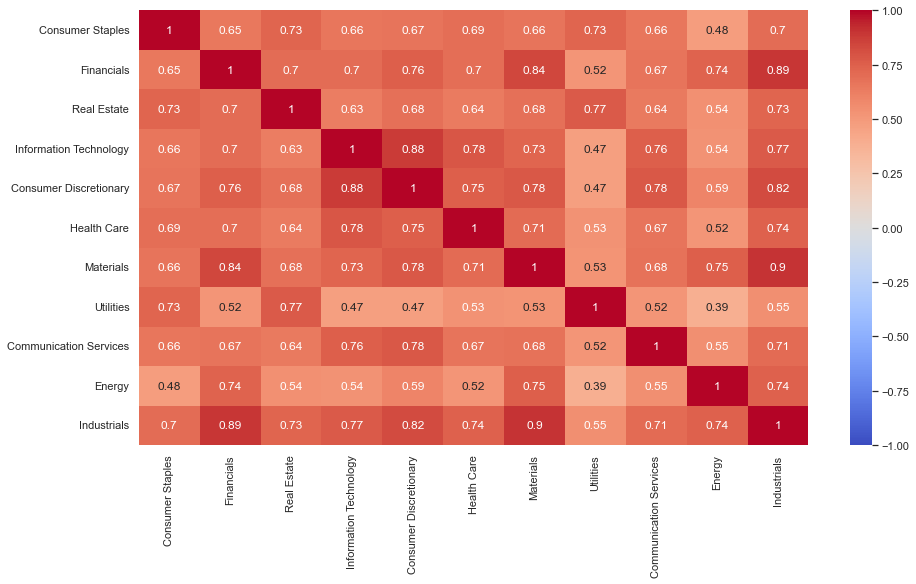

In [92]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_TOT.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


# FAMA-FRENCH

In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [94]:
factors = pd.read_csv('data/F-F_Research_Data_Factors_daily.csv',index_col=0)
factors

# convert Date index to datetime object
factors.index= pd.to_datetime(factors.index, format="%Y%m%d")
#factors = factors.resample('1d').mean()

factors.dropna()

factors.rename_axis('Date')\
 .reset_index()

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-01,0.10,-0.23,-0.28,0.009
1,1926-07-02,0.45,-0.34,-0.03,0.009
2,1926-07-06,0.17,0.29,-0.38,0.009
3,1926-07-07,0.09,-0.59,0.00,0.009
4,1926-07-08,0.21,-0.38,0.18,0.009
...,...,...,...,...,...
25079,2021-09-24,0.08,-0.46,0.70,0.000
25080,2021-09-27,-0.10,1.27,2.39,0.000
25081,2021-09-28,-2.18,-0.42,1.75,0.000
25082,2021-09-29,0.03,-0.29,0.80,0.000


In [95]:
factors.iloc[:, 0:3:1]

,Mkt-RF,SMB,HML
Date,,,
1926-07-01,0.10,-0.23,-0.28
1926-07-02,0.45,-0.34,-0.03
1926-07-06,0.17,0.29,-0.38
1926-07-07,0.09,-0.59,0.00
1926-07-08,0.21,-0.38,0.18
...,...,...,...
2021-09-24,0.08,-0.46,0.70
2021-09-27,-0.10,1.27,2.39
2021-09-28,-2.18,-0.42,1.75


In [96]:
#prices_df = factors.iloc[:, 0:4:1]


#def price_to_returns(prices_df:pd.DataFrame, lag) -> pd.DataFrame:
#    assert prices_df.index.is_monotonic_increasing
 #   prices_past = prices_df.iloc[:-lag, :]
 #   prices_future = prices_df.iloc[lag:,:]
  #  return (prices_future / prices_past.values) - 1.



#factors_returns = price_to_returns(factors.iloc[:, 0:4:1], 1)
#factors_returns.head()

In [97]:
df = df_TOT.merge(factors, on='Date')

#df1 = df.dropna()
#df1

df.drop('RF', axis=1, inplace=True)

df1  = df.dropna()

df1

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials,Mkt-RF,SMB,HML
Date,,,,,,,,,,,,,,
2015-02-06,-0.003350,0.004268,-0.025132,-0.004439,-0.001623,-0.008539,-0.000356,-0.039556,0.007173,-0.001303,-0.002094,-0.20,0.08,0.36
2015-02-09,-0.006387,-0.005579,-0.004158,-0.001137,-0.003734,-0.011286,-0.002139,-0.009631,0.000133,0.002614,-0.000470,-0.46,-0.37,0.11
2015-02-10,0.011502,0.006311,0.002923,0.014848,0.011925,0.015620,0.007856,0.019785,0.009423,-0.003475,0.004673,1.05,-0.31,-0.72
2015-02-11,0.005351,0.000348,-0.001665,0.004398,0.000000,0.001183,-0.001414,-0.021375,-0.000107,-0.006443,0.000698,0.03,-0.09,-0.33
2015-02-12,0.003387,0.010104,0.011259,0.016265,0.011111,0.005196,0.017039,-0.004032,0.001702,0.015248,0.009414,1.00,0.15,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.000701,0.005534,-0.011065,-0.000080,0.001447,-0.005413,-0.001105,-0.001427,0.006169,0.006461,0.001219,0.08,-0.46,0.70
2021-09-27,-0.002803,0.013575,-0.012788,-0.009630,0.004456,-0.012094,0.010177,-0.011196,-0.001060,0.038516,0.003184,-0.10,1.27,2.39
2021-09-28,-0.010775,-0.015023,-0.005505,-0.031521,-0.018943,-0.019740,-0.011170,-0.012527,-0.026111,0.002747,-0.013256,-2.18,-0.42,1.75


## FIRST METHOD

In [98]:
f = df1.iloc[:, 11:14:1].mean() * 252
f2 = f.to_frame(name="f")["f"]
f2[0:3]

Mkt-RF    14.263952
SMB        0.815427
HML       -4.848931
Name: f, dtype: float64

In [99]:
s = df1.iloc[:,0:11:1].mean() * 252
s_df = s.to_frame(name="s")["s"]
s_df[0:11]

Consumer Staples          0.062461
Financials                0.122658
Real Estate               0.054058
Information Technology    0.225325
Consumer Discretionary    0.169866
Health Care               0.111537
Materials                 0.092482
Utilities                 0.060711
Communication Services    0.118743
Energy                   -0.020317
Industrials               0.111313
Name: s, dtype: float64

In [100]:
new0 = pd.DataFrame(pd.concat([s_df, f2])).T
new0

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials,Mkt-RF,SMB,HML
0,0.062461,0.122658,0.054058,0.225325,0.169866,0.111537,0.092482,0.060711,0.118743,-0.020317,0.111313,14.263952,0.815427,-4.848931


In [101]:
y = new0.loc[0, "Consumer Staples":"Industrials"]
y

Consumer Staples          0.062461
Financials                0.122658
Real Estate               0.054058
Information Technology    0.225325
Consumer Discretionary    0.169866
Health Care               0.111537
Materials                 0.092482
Utilities                 0.060711
Communication Services    0.118743
Energy                   -0.020317
Industrials               0.111313
Name: 0, dtype: float64

In [102]:
new = pd.concat([s_df,f2]).to_frame().T
new

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials,Mkt-RF,SMB,HML
0,0.062461,0.122658,0.054058,0.225325,0.169866,0.111537,0.092482,0.060711,0.118743,-0.020317,0.111313,14.263952,0.815427,-4.848931


In [103]:
y = new.iloc[0, 0:11:1]
y

Consumer Staples          0.062461
Financials                0.122658
Real Estate               0.054058
Information Technology    0.225325
Consumer Discretionary    0.169866
Health Care               0.111537
Materials                 0.092482
Utilities                 0.060711
Communication Services    0.118743
Energy                   -0.020317
Industrials               0.111313
Name: 0, dtype: float64

In [104]:
X = new.iloc[0, 11:14]

X

Mkt-RF    14.263952
SMB        0.815427
HML       -4.848931
Name: 0, dtype: float64

In [138]:
y = new.iloc[:, 0:11:1]
X = new.iloc[:, 11:14:1]
X = sm.add_constant(X)
model = sm.OLS(y,X)
res = model.fit()
#print(res.summary())

#print(res.HC0_se) # White/robust standard error


betas2 = res.params
#df3 = pd.DataFrame(data = betas, columns=['Consumer Staples', 'Financials', 'Real Estate'])
#print(betas)
betas2.columns = ['Consumer Staples', 'Financials', 'Real Estate', 'Information Technology',
                 'Consumer Discretionary','Health Care','Materials','Utilities',
                 'Communication Services','Energy','Industrials']
betas2

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials
Mkt-RF,0.003914,0.007686,0.003387,0.014119,0.010644,0.006989,0.005795,0.003804,0.007441,-0.001273,0.006975
SMB,0.000224,0.000439,0.000194,0.000807,0.000608,0.000400,0.000331,0.000217,0.000425,-0.000073,0.000399
HML,-0.001330,-0.002613,-0.001152,-0.004800,-0.003618,-0.002376,-0.001970,-0.001293,-0.002529,0.000433,-0.002371


In [106]:
df2 = df1.append(s, ignore_index = True)
df2

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials,Mkt-RF,SMB,HML
0,-0.003350,0.004268,-0.025132,-0.004439,-0.001623,-0.008539,-0.000356,-0.039556,0.007173,-0.001303,-0.002094,-0.20,0.08,0.36
1,-0.006387,-0.005579,-0.004158,-0.001137,-0.003734,-0.011286,-0.002139,-0.009631,0.000133,0.002614,-0.000470,-0.46,-0.37,0.11
2,0.011502,0.006311,0.002923,0.014848,0.011925,0.015620,0.007856,0.019785,0.009423,-0.003475,0.004673,1.05,-0.31,-0.72
3,0.005351,0.000348,-0.001665,0.004398,0.000000,0.001183,-0.001414,-0.021375,-0.000107,-0.006443,0.000698,0.03,-0.09,-0.33
4,0.003387,0.010104,0.011259,0.016265,0.011111,0.005196,0.017039,-0.004032,0.001702,0.015248,0.009414,1.00,0.15,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,-0.002803,0.013575,-0.012788,-0.009630,0.004456,-0.012094,0.010177,-0.011196,-0.001060,0.038516,0.003184,-0.10,1.27,2.39
1672,-0.010775,-0.015023,-0.005505,-0.031521,-0.018943,-0.019740,-0.011170,-0.012527,-0.026111,0.002747,-0.013256,-2.18,-0.42,1.75
1673,0.008700,0.000735,0.007489,-0.002343,-0.000978,0.005776,-0.004651,0.013418,-0.004468,0.000000,0.000757,0.03,-0.29,0.80
1674,-0.017546,-0.014139,-0.017453,-0.005116,-0.018104,-0.009623,-0.014909,-0.009148,-0.001122,-0.013014,-0.018907,-1.02,0.30,-0.77


In [107]:
df2 = df1.append(s, ignore_index = True)

df2

df3 = df2.append(f, ignore_index = True)

df3.tail(-1).fillna(df3.tail(-1))

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials,Mkt-RF,SMB,HML
1,-0.006387,-0.005579,-0.004158,-0.001137,-0.003734,-0.011286,-0.002139,-0.009631,0.000133,0.002614,-0.000470,-0.460000,-0.370000,0.110000
2,0.011502,0.006311,0.002923,0.014848,0.011925,0.015620,0.007856,0.019785,0.009423,-0.003475,0.004673,1.050000,-0.310000,-0.720000
3,0.005351,0.000348,-0.001665,0.004398,0.000000,0.001183,-0.001414,-0.021375,-0.000107,-0.006443,0.000698,0.030000,-0.090000,-0.330000
4,0.003387,0.010104,0.011259,0.016265,0.011111,0.005196,0.017039,-0.004032,0.001702,0.015248,0.009414,1.000000,0.150000,-0.060000
5,-0.003710,-0.000007,-0.004948,0.006771,0.006327,0.004823,0.009424,-0.013225,0.000527,0.021148,0.006767,0.470000,0.170000,-0.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,-0.010775,-0.015023,-0.005505,-0.031521,-0.018943,-0.019740,-0.011170,-0.012527,-0.026111,0.002747,-0.013256,-2.180000,-0.420000,1.750000
1673,0.008700,0.000735,0.007489,-0.002343,-0.000978,0.005776,-0.004651,0.013418,-0.004468,0.000000,0.000757,0.030000,-0.290000,0.800000
1674,-0.017546,-0.014139,-0.017453,-0.005116,-0.018104,-0.009623,-0.014909,-0.009148,-0.001122,-0.013014,-0.018907,-1.020000,0.300000,-0.770000
1675,0.062461,0.122658,0.054058,0.225325,0.169866,0.111537,0.092482,0.060711,0.118743,-0.020317,0.111313,NaN,NaN,NaN


# SECOND METHOD


In [108]:
# WITHOUT CONSTANT

y = df1.iloc[:, 0:11:1]
X = df1.iloc[:, 11:14:1]
#X = sm.add_constant(X)
model = sm.OLS(y,X)
res = model.fit()
#print(res.summary())

#print(res.HC0_se) # White/robust standard error


betas = res.params
#df3 = pd.DataFrame(data = betas, columns=['Consumer Staples', 'Financials', 'Real Estate'])
print(betas)

              0         1         2         3         4         5         6   \
Mkt-RF  0.006607  0.010440  0.008400  0.011899  0.009888  0.008767  0.009856   
SMB    -0.003270 -0.000095 -0.000513 -0.000974  0.001444 -0.000080  0.001988   
HML     0.000508  0.007366  0.001988 -0.003720 -0.001293 -0.002244  0.003841   

              7         8         9         10  
Mkt-RF  0.006652  0.008823  0.011048  0.009885  
SMB    -0.003897  0.000439  0.002900  0.001075  
HML     0.001397 -0.000653  0.009731  0.003761  


---------------------

In [109]:
df1.iloc[:,0:11:1]

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials
Date,,,,,,,,,,,
2015-02-06,-0.003350,0.004268,-0.025132,-0.004439,-0.001623,-0.008539,-0.000356,-0.039556,0.007173,-0.001303,-0.002094
2015-02-09,-0.006387,-0.005579,-0.004158,-0.001137,-0.003734,-0.011286,-0.002139,-0.009631,0.000133,0.002614,-0.000470
2015-02-10,0.011502,0.006311,0.002923,0.014848,0.011925,0.015620,0.007856,0.019785,0.009423,-0.003475,0.004673
2015-02-11,0.005351,0.000348,-0.001665,0.004398,0.000000,0.001183,-0.001414,-0.021375,-0.000107,-0.006443,0.000698
2015-02-12,0.003387,0.010104,0.011259,0.016265,0.011111,0.005196,0.017039,-0.004032,0.001702,0.015248,0.009414
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.000701,0.005534,-0.011065,-0.000080,0.001447,-0.005413,-0.001105,-0.001427,0.006169,0.006461,0.001219
2021-09-27,-0.002803,0.013575,-0.012788,-0.009630,0.004456,-0.012094,0.010177,-0.011196,-0.001060,0.038516,0.003184
2021-09-28,-0.010775,-0.015023,-0.005505,-0.031521,-0.018943,-0.019740,-0.011170,-0.012527,-0.026111,0.002747,-0.013256


## SECOND METHOD

# ===================================================================================
# Multivariate regression of portfolio returns on market return, SMB, and HML factor
# ===================================================================================



In [136]:
# ===================================================================================
# Multivariate regression of portfolio returns on market return, SMB, and HML factor
# ===================================================================================



y = df1.iloc[:, 0:11:1]
X = df1[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
#res = model.fit()
#res.summary(xname=["foo", "bar"])

#print(res.HC0_se) # White/robust standard error


betas = res.params
#df3 = pd.DataFrame(data = betas, columns=['Consumer Staples', 'Financials', 'Real Estate'])
#print(betas)
#betas
#betas = pd.DataFrame
#betas.rename(columns = {0:'team_name', 1:'points_scored'})
#betas.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4']
betas.columns = ['Consumer Staples', 'Financials', 'Real Estate', 'Information Technology',
                 'Consumer Discretionary','Health Care','Materials','Utilities',
                 'Communication Services','Energy','Industrials']
betas

,Consumer Staples,Financials,Real Estate,Information Technology,Consumer Discretionary,Health Care,Materials,Utilities,Communication Services,Energy,Industrials
Mkt-RF,0.006607,0.010440,0.008400,0.011899,0.009888,0.008767,0.009856,0.006652,0.008823,0.011048,0.009885
SMB,-0.003270,-0.000095,-0.000513,-0.000974,0.001444,-0.000080,0.001988,-0.003897,0.000439,0.002900,0.001075
HML,0.000508,0.007366,0.001988,-0.003720,-0.001293,-0.002244,0.003841,0.001397,-0.000653,0.009731,0.003761


In [137]:
y = df1.loc[:,'Consumer Staples':'Industrials':1]
X = df1[['Mkt-RF', 'SMB', 'HML']]
#X = smf.add_constant(X)
model = sm.OLS(y,X)
res = model.fit()
#print(res.summary())

#print(res.HC0_se) # White/robust standard error


betas = res.params
print(betas)

              0         1         2         3         4         5         6   \
Mkt-RF  0.006607  0.010440  0.008400  0.011899  0.009888  0.008767  0.009856   
SMB    -0.003270 -0.000095 -0.000513 -0.000974  0.001444 -0.000080  0.001988   
HML     0.000508  0.007366  0.001988 -0.003720 -0.001293 -0.002244  0.003841   

              7         8         9         10  
Mkt-RF  0.006652  0.008823  0.011048  0.009885  
SMB    -0.003897  0.000439  0.002900  0.001075  
HML     0.001397 -0.000653  0.009731  0.003761  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [x for x in range(2013, 2021)]
population_by_continent = {
    'Market': [0.010396, 0.006627],
    'Size': [0.000117, -0.003192],
    'Value': [0.007253, 0.000437],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

In [ ]:
list1 = []
for i in df_TOT.columns:
    r = df_TOT[i].mean() * 252
    ret = list1.append(r)
    
list1

In [ ]:
import statsmodels.api as sm

In [ ]:
ann_mean = factors.mean() * 252
ann_mean

In [ ]:
factors_cum = factors.cumsum()
factors_cum.plot.line()


In [ ]:
r_FI = df_TOT['Consumer Staples'].mean() * 252
r_FI

In [ ]:
factors.columns



In [ ]:
y2 = df_TOT['Financials'].mean() * 252

y2

In [ ]:
df_oil = pd.read_csv('data/oil.csv',index_col = 'Date', parse_dates=True)
# Filter data between two dates
df_oil

In [ ]:
filtered_df1 = df_oil.loc['2012-01-01' :'2018-12-31']
# Display
filtered_df1

In [ ]:
filtered_df1.std()

In [ ]:
filtered_df1.plot.line()
plt.title('Oil $ price')

In [ ]:
df_gas = pd.read_csv('data/gas.csv',index_col = 'Date', parse_dates=True)
# Filter data between two dates
df_gas

In [ ]:
filtered_df = df_gas.loc['2012-01-01' :'2019-01-01']
# Display
filtered_df

In [ ]:
filtered_df.std()

In [ ]:
filtered_df.plot.line()
plt.title('Natural Gas $ price')